In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/diabetes (1).csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


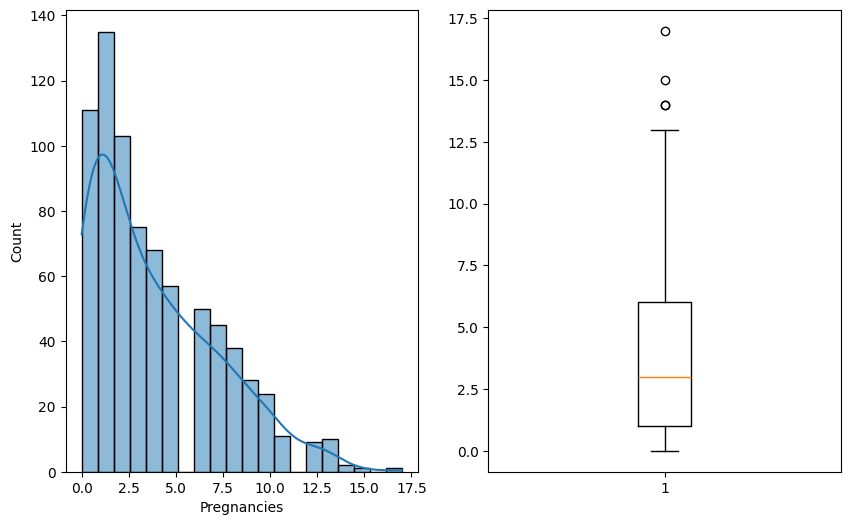

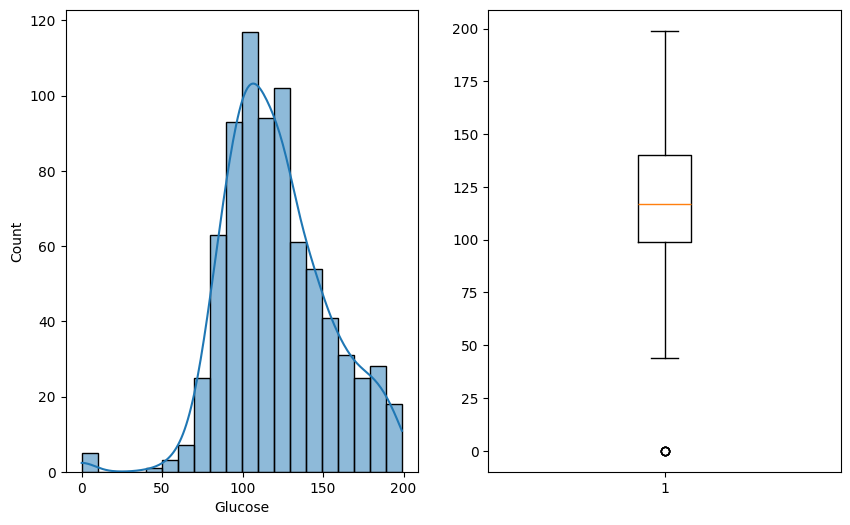

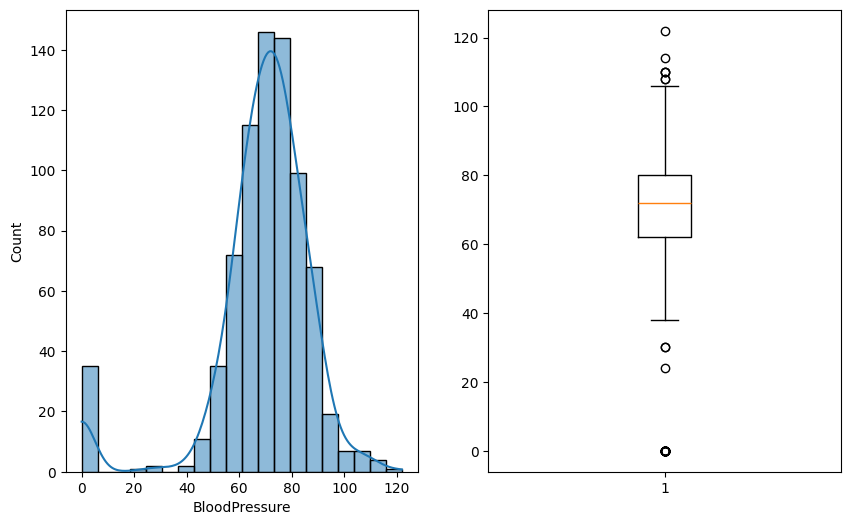

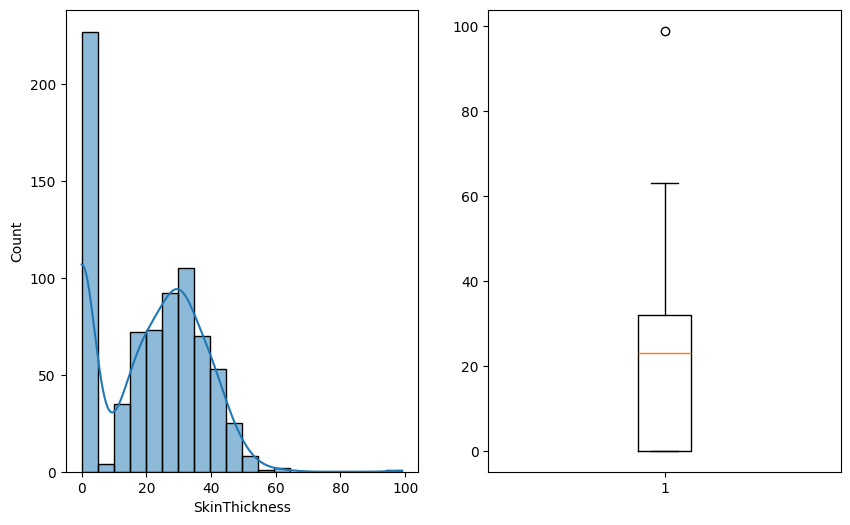

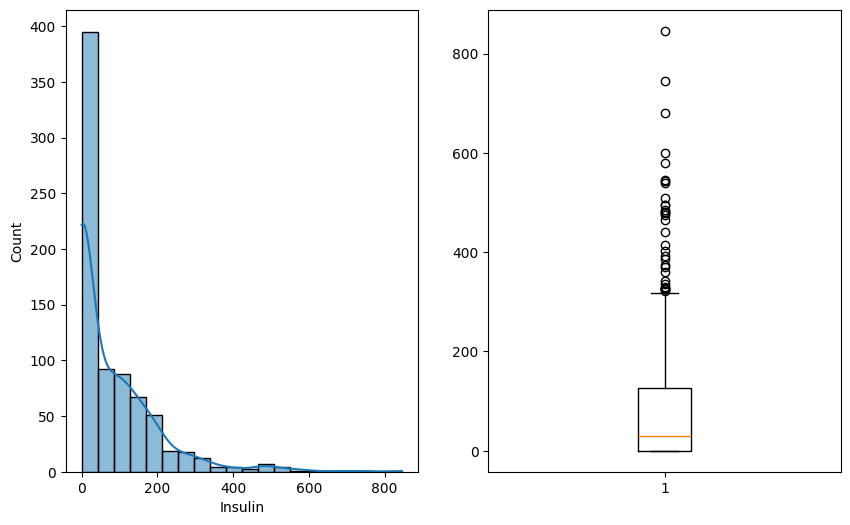

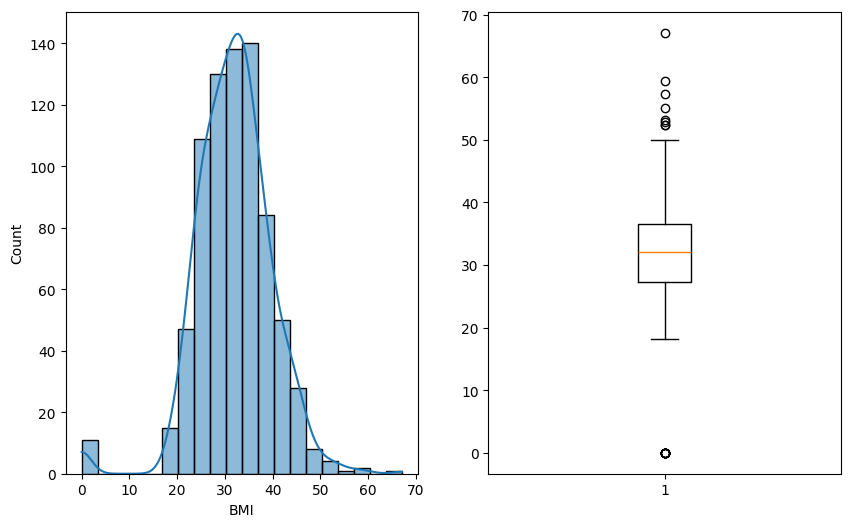

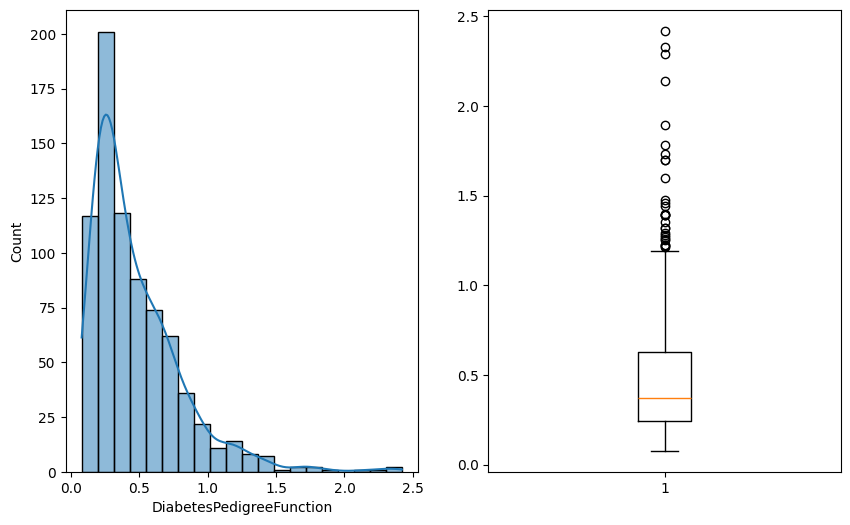

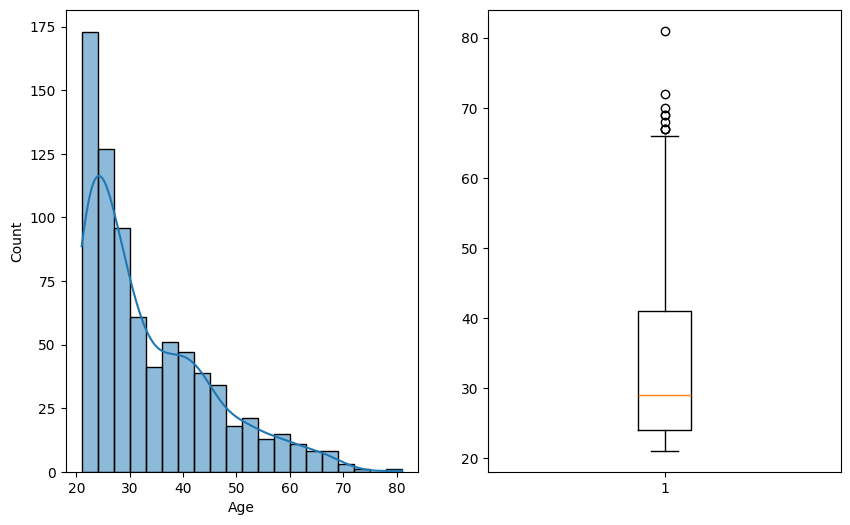

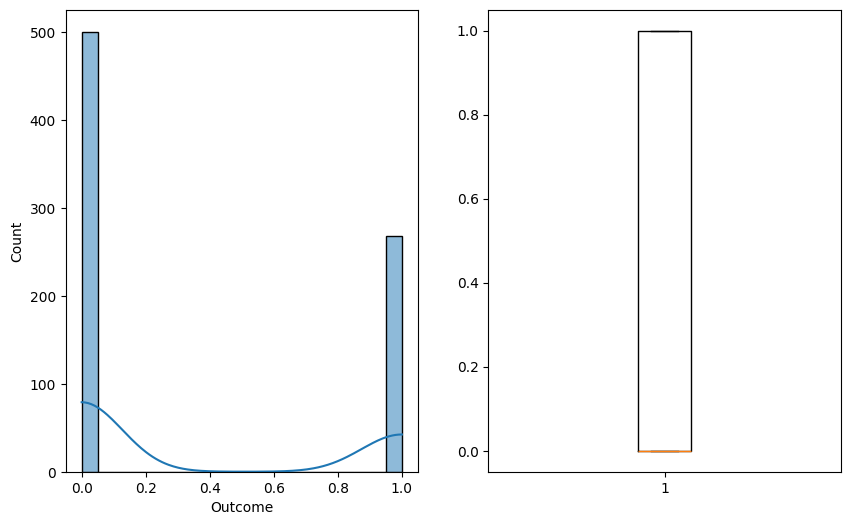

In [9]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins = 20, alpha = 0.5, kde=True)
    plt.xlabel(col)
    plt.subplot(1,2,2)
    plt.boxplot(df[col])

In [10]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [11]:
for col in zero_not_accepted:
    df[col] = df[col].replace(0, np.nan)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.nan, mean)

In [12]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [14]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=27)

In [16]:
y_pred = knn.predict(X_test_scaled)

In [17]:
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  73.37662337662337


In [18]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1


In [19]:
new_data = [[4, 150, 71, 36, 160, 33.7, 0.630, 45]]
pred = knn.predict(standard.transform(new_data))
print("Predicted Outcome: ", pred)

Predicted Outcome:  [1]
